In [24]:
# Common libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

# Libraries for Problem Transformation

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

# Libraries for model training

from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# Libraries for algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Libraries for testing

from sklearn.metrics import accuracy_score , classification_report

## Problem Statement:
### Predict how likely it is that the people will take an H1N1 flu vaccine using Logistic Regression.


In [25]:
df=pd.read_csv('D:\Google Drive\imarticus python\Eneeyan\h1n1_vaccine_prediction.csv')
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [26]:
df.duplicated().sum()


0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [28]:
df.drop(['unique_id'],axis=1,inplace=True)

In [29]:
df.skew()

C:\Users\samee\AppData\Local\Temp\ipykernel_8512\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


h1n1_worry                  -0.159913
h1n1_awareness              -0.239224
antiviral_medication         4.186503
contact_avoidance           -1.011306
bought_face_mask             3.401744
wash_hands_frequently       -1.716380
avoid_large_gatherings       0.589522
reduced_outside_home_cont    0.688227
avoid_touch_face            -0.758355
dr_recc_h1n1_vacc            1.349742
dr_recc_seasonal_vacc        0.724397
chronic_medic_condition      0.962097
cont_child_undr_6_mnths      3.033008
is_health_worker             2.462087
has_health_insur            -2.334909
is_h1n1_vacc_effective      -0.902706
is_h1n1_risky                0.672957
sick_from_h1n1_vacc          0.651281
is_seas_vacc_effective      -1.315177
is_seas_risky                0.250923
sick_from_seas_vacc          0.919587
no_of_adults                 0.786572
no_of_children               1.543903
h1n1_vaccine                 1.406022
dtype: float64

DEALING WITH NULL VALUES

In [36]:
nulls=df.isnull().sum()
nulls


h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [32]:
null_1=df.select_dtypes('float64')
list1=[]
for i in null_1:
    list1.append(i)
print(list1)    

def fillna(df,list1):
    for i in list1:
        df[i]=df[i].fillna(df[i].median())
    return df
fillna(df,list1)

['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children']


,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [33]:
# CATEGORIAL
null_2=df.select_dtypes('object')
list2=[]
for j in null_2:
    list2.append(i)
print(list2)  

def fillna(df,list2):
    for j in null_2:
        df[j]=df[j].fillna(df[j].mode()[0])
    return df
fillna(df,list2)

['no_of_children', 'no_of_children', 'no_of_children', 'no_of_children', 'no_of_children', 'no_of_children', 'no_of_children', 'no_of_children', 'no_of_children']


,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [37]:
nulls


h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

DATA VISUALIZATION

In [38]:
df.shape

(26707, 33)

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

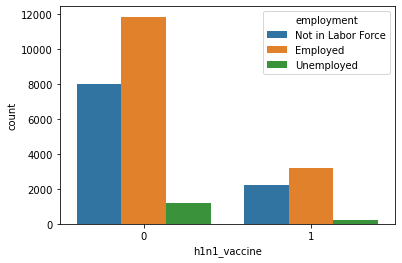

In [41]:
sns.countplot(x='h1n1_vaccine',hue='employment',data=df)

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

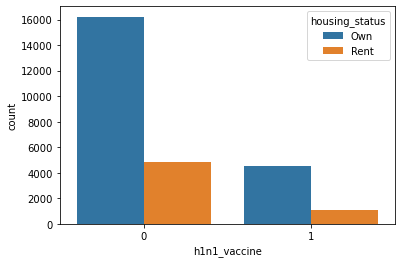

In [45]:
sns.countplot(x='h1n1_vaccine',hue='housing_status',data=df)

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

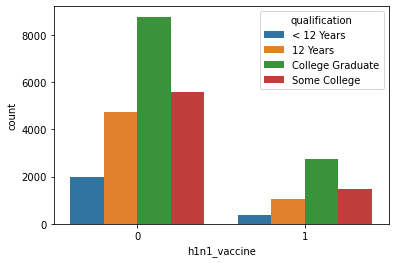

In [44]:
sns.countplot(x='h1n1_vaccine',hue='qualification',data=df)

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

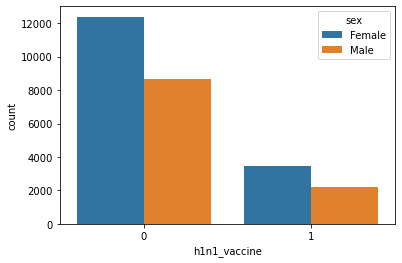

In [47]:
sns.countplot(x="h1n1_vaccine",hue="sex",data=df)

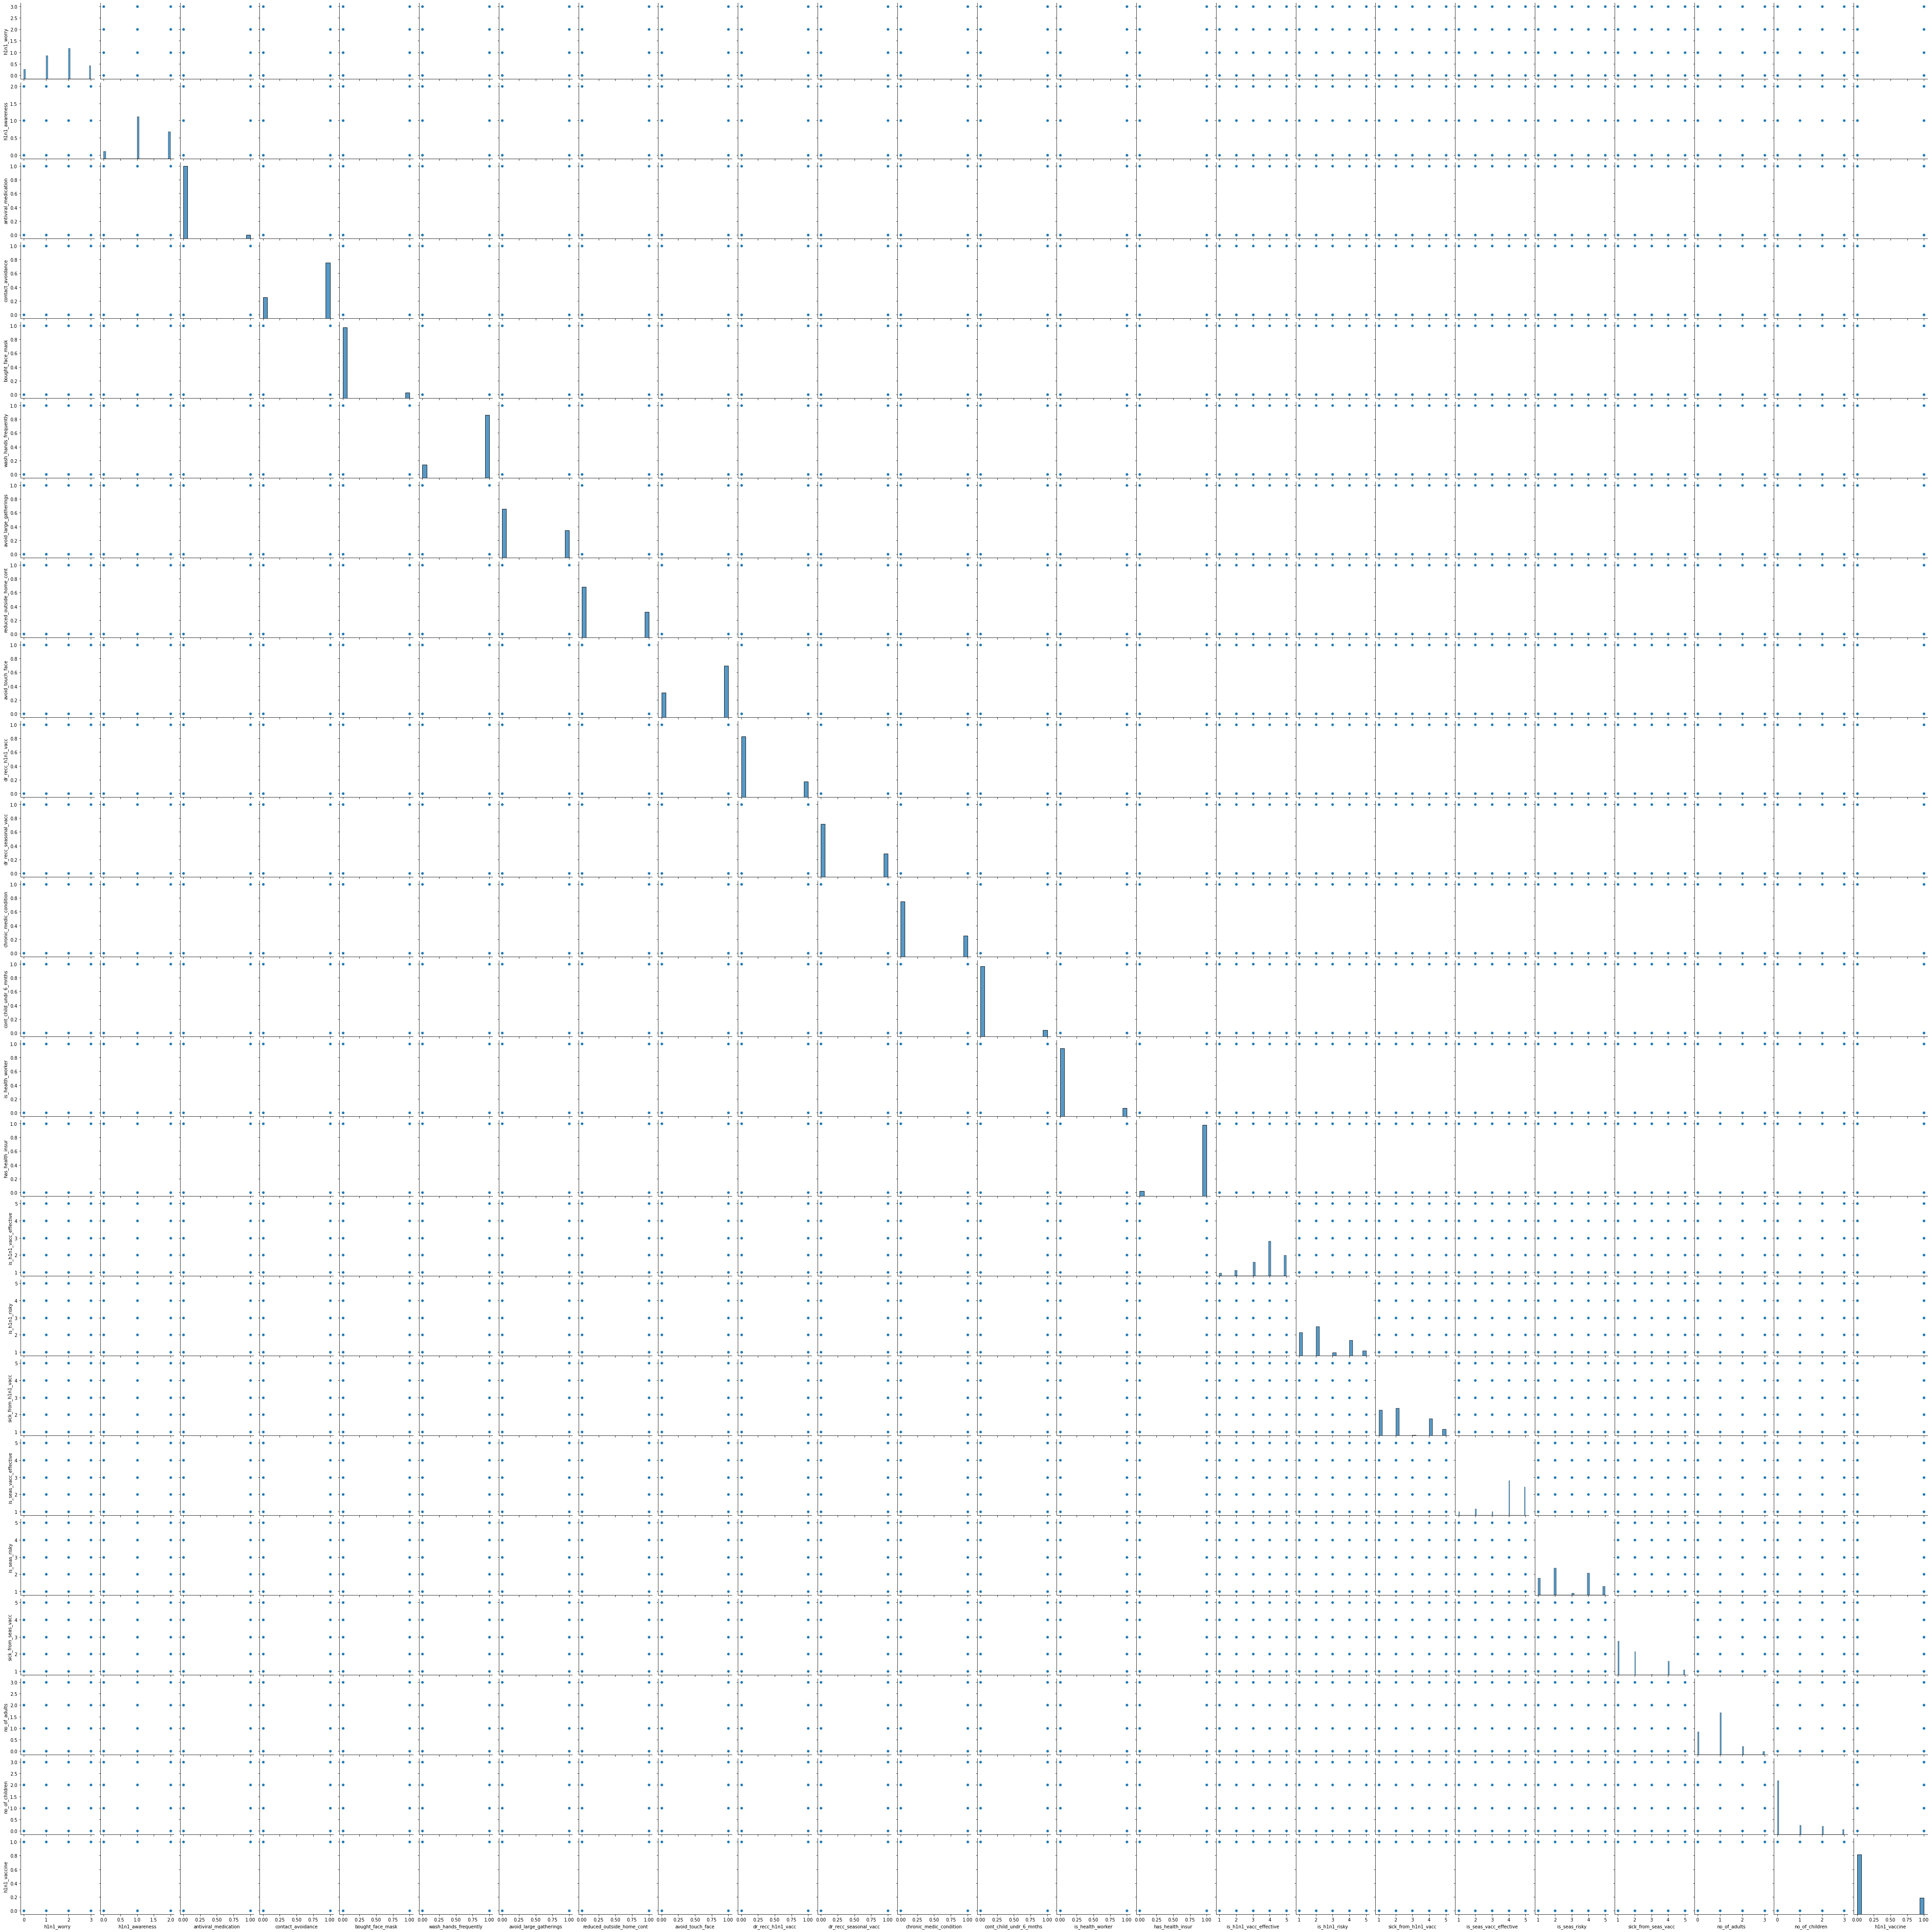

In [48]:
sns.pairplot(df)

In [ ]:
sns.heatmap(df.corr())

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

ENCODING

In [51]:
def encode(data):
    le=LabelEncoder()
    for i in data.columns:
        if data[i].dtype=='object':
            data[i]=le.fit_transform(data[i])
    return data

In [52]:
encode(df)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,0,0,0,0,0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3,0,0,1,0,1,2,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,1,0,1,1,0,1,1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,3,0,0,1,0,0,0,0.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,1,0,2,1.0,0.0,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [ ]:
df.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [ ]:
df.shape

(26707, 37)

X AND Y

In [60]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [62]:
x.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,3,0,2,1,0,1,2,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,3,1,2,1,1,0,0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,1,0,1,0,0,0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,3,0,2,1,1,1,1,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,3,0,0,0,0,0,0,1.0,0.0


In [61]:
y.head()

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0


MODEL

In [63]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(xtrain,ytrain)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [65]:
ypred=log.predict(xtest)
ypred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
con_mat=confusion_matrix(ypred,ytest)
print("Confusion Matrix : ",con_mat)
print(' ')
print("Accuracy Score : ",accuracy_score(ypred,ytest))
print(' ')
classification_report(ypred,ytest)

Confusion Matrix :  [[6019  965]
 [ 311  718]]
 
Accuracy Score :  0.8407587670036191
 


'              precision    recall  f1-score   support\n\n           0       0.95      0.86      0.90      6984\n           1       0.43      0.70      0.53      1029\n\n    accuracy                           0.84      8013\n   macro avg       0.69      0.78      0.72      8013\nweighted avg       0.88      0.84      0.86      8013\n'